In [387]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

In [351]:
df=pd.read_csv('heart_diseaseucimachine.csv')
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3
301,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1


# Full Column Names

In [352]:
df.shape

(303, 14)

In this dataset ,303 rows & 14 columns are present

In [353]:
#checking columns name

df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'],
      dtype='object')

In [354]:
#checking the datatypes of column

df.dtypes

age         float64
sex         float64
cp          float64
trestbps    float64
chol        float64
fbs         float64
restecg     float64
thalach     float64
exang       float64
oldpeak     float64
slope       float64
ca           object
thal         object
num           int64
dtype: object

In [355]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    float64
 1   sex       303 non-null    float64
 2   cp        303 non-null    float64
 3   trestbps  303 non-null    float64
 4   chol      303 non-null    float64
 5   fbs       303 non-null    float64
 6   restecg   303 non-null    float64
 7   thalach   303 non-null    float64
 8   exang     303 non-null    float64
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    float64
 11  ca        303 non-null    object 
 12  thal      303 non-null    object 
 13  num       303 non-null    int64  
dtypes: float64(11), int64(1), object(2)
memory usage: 33.3+ KB


In [356]:
#replacing '?' with nan value in ca & thal column

df.replace({'ca':{'?':np.nan}},regex=False,inplace=True)

In [357]:
df.replace({'thal':{'?':np.nan}},regex=False,inplace=True)

In [358]:
#changing object type to float type

col=['ca','thal']
for c in col:
    df[c]=df[c].astype(float)

In [359]:
#again checking datatype
df.dtypes

age         float64
sex         float64
cp          float64
trestbps    float64
chol        float64
fbs         float64
restecg     float64
thalach     float64
exang       float64
oldpeak     float64
slope       float64
ca          float64
thal        float64
num           int64
dtype: object

# Checking null values

In [360]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
num         0
dtype: int64

we see that there are only 6 cells with null value,with 4 belonging to attribute ca & 2 to thal.
We can also see this with the help of visualization for better clarity

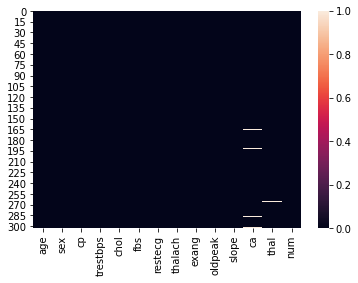

In [361]:
sns.heatmap(df.isnull())

# Imputing null values

In [362]:
#Imputing null values
from sklearn.impute import SimpleImputer
imp=SimpleImputer(strategy='most_frequent')
df['ca']=imp.fit_transform(df['ca'].values.reshape(-1,1))
df['thal']=imp.fit_transform(df['thal'].values.reshape(-1,1))

df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64

# Summary Statistics

In [363]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.663366,4.722772,0.937294
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.934375,1.938383,1.228536
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,4.000000


In [364]:
#checking unique values of target column
df['num'].value_counts()

0    164
1     55
2     36
3     35
4     13
Name: num, dtype: int64

In [365]:
df['num']=df.num.map({0:0,1:1,2:1,3:1,4:1})
df['num'].value_counts()

0    164
1    139
Name: num, dtype: int64

we nocice that out of total 139 people are suffering from heart disease

# check corelation

In [366]:
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
age,1.000000,-0.097542,0.104139,0.284946,0.208950,0.118530,0.148868,-0.393806,0.091661,0.203805,0.161770,0.365323,0.128303,0.223120
sex,-0.097542,1.000000,0.010084,-0.064456,-0.199915,0.047862,0.021647,-0.048663,0.146201,0.102173,0.037533,0.086048,0.380581,0.276816
cp,0.104139,0.010084,1.000000,-0.036077,0.072319,-0.039975,0.067505,-0.334422,0.384060,0.202277,0.152050,0.233117,0.262089,0.414446
trestbps,0.284946,-0.064456,-0.036077,1.000000,0.130120,0.175340,0.146560,-0.045351,0.064762,0.189171,0.117382,0.097528,0.134424,0.150825
chol,0.208950,-0.199915,0.072319,0.130120,1.000000,0.009841,0.171043,-0.003432,0.061310,0.046564,-0.004062,0.123726,0.018351,0.085164
fbs,0.118530,0.047862,-0.039975,0.175340,0.009841,1.000000,0.069564,-0.007854,0.025665,0.005747,0.059894,0.140764,0.064625,0.025264
restecg,0.148868,0.021647,0.067505,0.146560,0.171043,0.069564,1.000000,-0.083389,0.084867,0.114133,0.133946,0.131749,0.024325,0.169202
thalach,-0.393806,-0.048663,-0.334422,-0.045351,-0.003432,-0.007854,-0.083389,1.000000,-0.378103,-0.343085,-0.385601,-0.265699,-0.274142,-0.417167
exang,0.091661,0.146201,0.384060,0.064762,0.061310,0.025665,0.084867,-0.378103,1.000000,0.288223,0.257748,0.145788,0.325240,0.431894
oldpeak,0.203805,0.102173,0.202277,0.189171,0.046564,0.005747,0.114133,-0.343085,0.288223,1.000000,0.577537,0.301067,0.342405,0.424510


 here we can see corelation b\w the columns
 
 for better understandin we can see it via visualization (with the help of heatmap

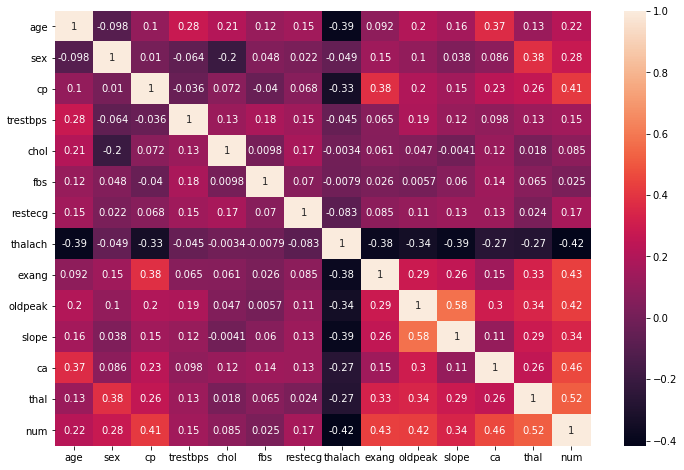

In [367]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(),annot=True)

In [368]:
#drop fbs

df.drop('fbs',axis=1,inplace=True)
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'restecg', 'thalach', 'exang',
       'oldpeak', 'slope', 'ca', 'thal', 'num'],
      dtype='object')

# Data Visualization

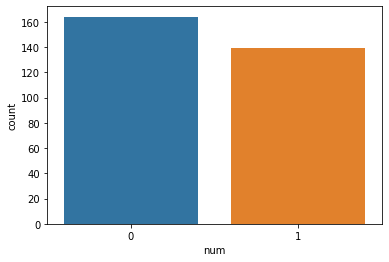

In [369]:
sns.countplot(df['num'])

From above graph we find that,no. of people having heart disease are less than ,that not having heart disease

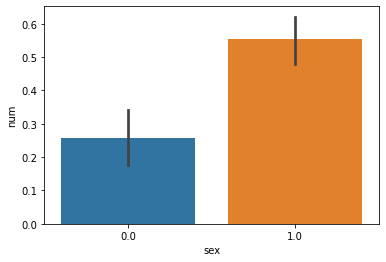

In [370]:
sns.barplot(x=df["sex"],y=df['num'])


we notice that males are more likely to have heart problems than female

In [371]:
#ANALYSING CHEST PAIN TYPE FEATURES

df['cp'].unique()

array([1., 4., 3., 2.])

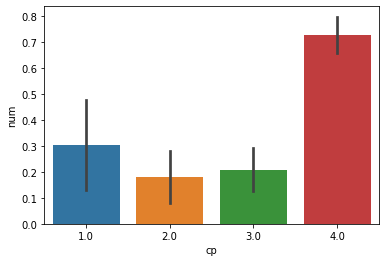

In [372]:
sns.barplot(df["cp"],y=df['num'])

From graph we notice, that chest pain of type '4.0', i.e. asymptomatic are much more likely to have heart problems

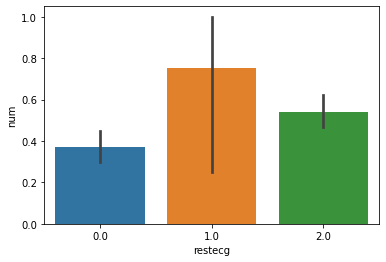

In [373]:
sns.barplot(df["restecg"],y=df['num'])

We notice that people with restecg '1'(having ST-T wave abnormality ) are much more likely to have a heart disease

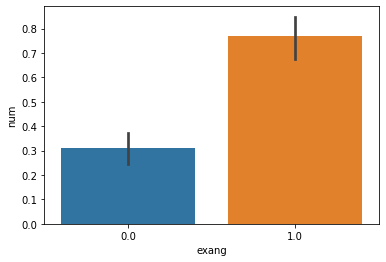

In [374]:
sns.barplot(df["exang"],y=df['num'])

People with exang=1 i.e. Exercise induced angina are more likely to have heart problems

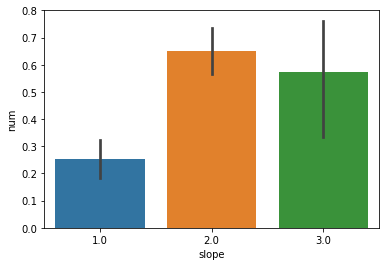

In [375]:
sns.barplot(df["slope"],y=df['num'])


from graph,it is clear  that Slope >= 2 causes more heart problem

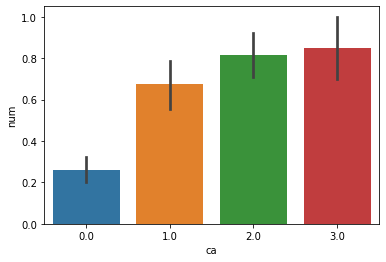

In [376]:
sns.barplot(df["ca"],y=df['num'])

ca=2.0 & 3.0 has large number of heart patients

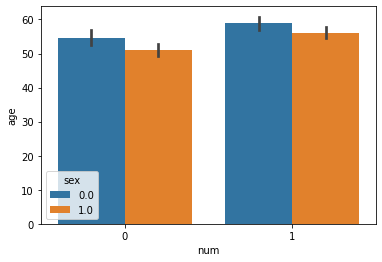

In [377]:
sns.barplot(x='num',y='age',hue='sex',data=df)

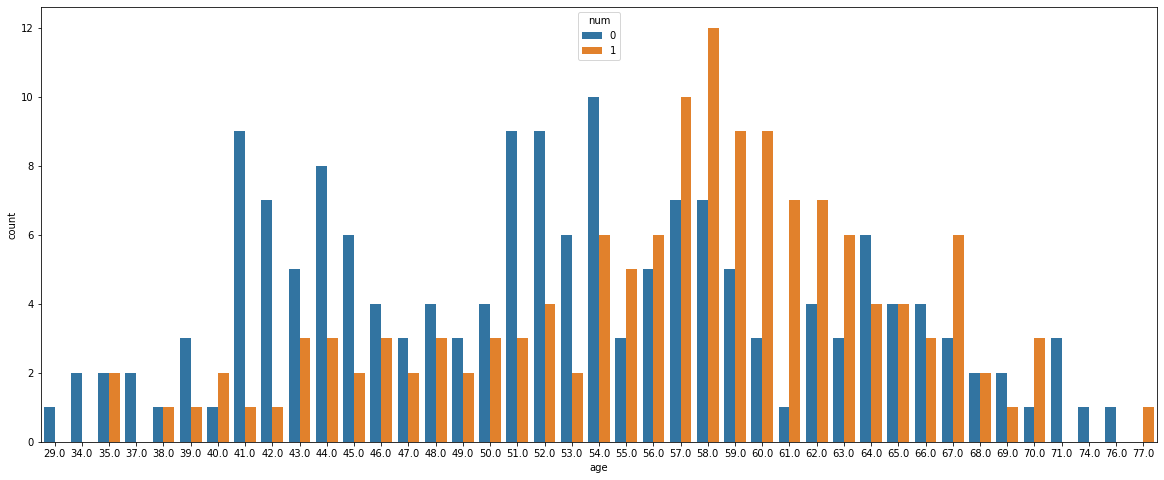

In [378]:
plt.figure(figsize=(20,8))
sns.countplot(df['age'],hue=df['num'])

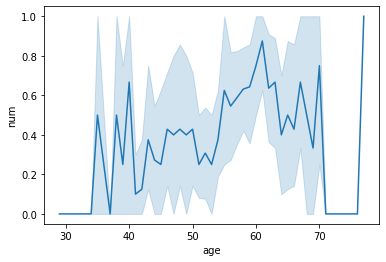

In [379]:
sns.lineplot(x=df['age'],y=df['num'])

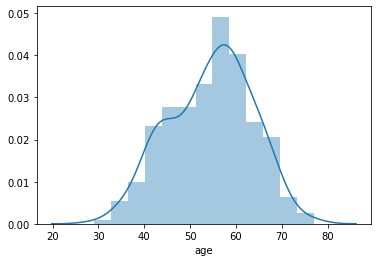

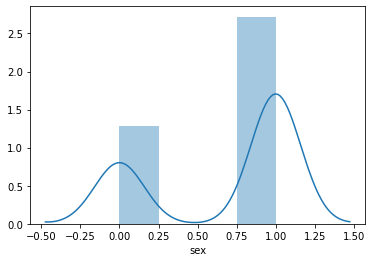

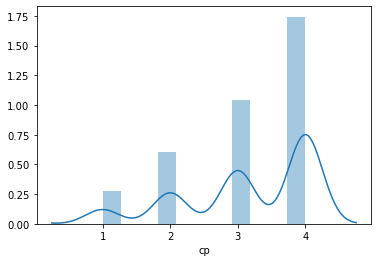

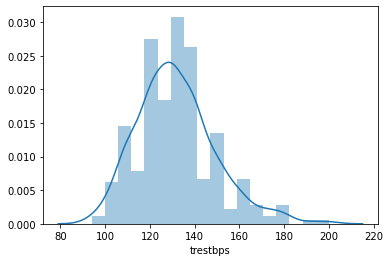

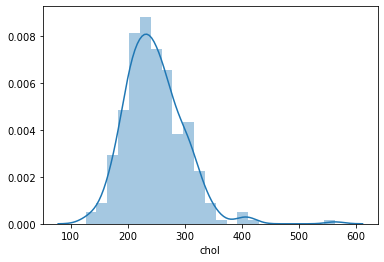

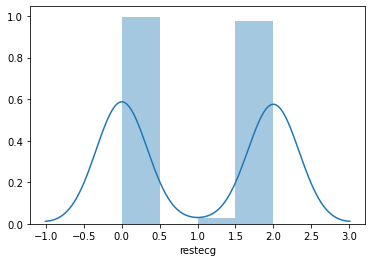

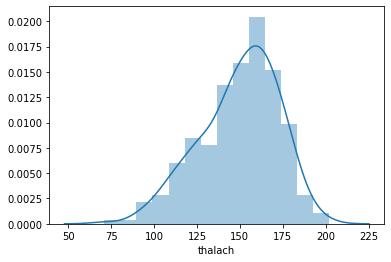

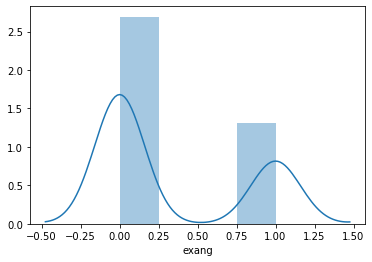

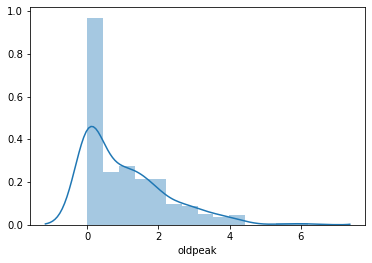

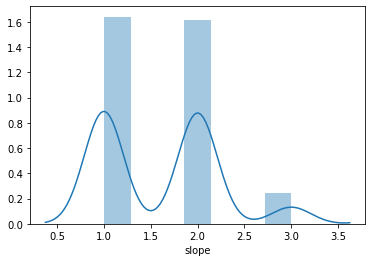

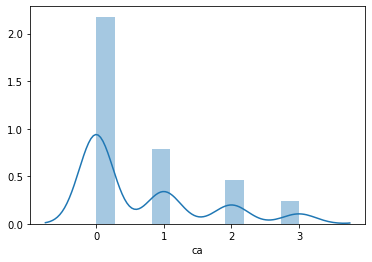

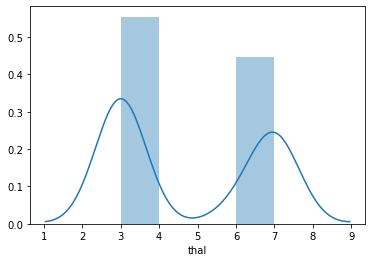

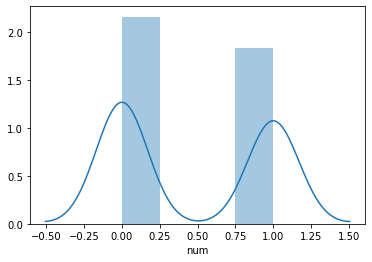

In [380]:
for i in df.columns:
    sns.distplot(df[i])
    plt.show()

# Plotting Outliers

age             AxesSubplot(0.125,0.71587;0.168478x0.16413)
sex          AxesSubplot(0.327174,0.71587;0.168478x0.16413)
cp           AxesSubplot(0.529348,0.71587;0.168478x0.16413)
trestbps     AxesSubplot(0.731522,0.71587;0.168478x0.16413)
chol           AxesSubplot(0.125,0.518913;0.168478x0.16413)
restecg     AxesSubplot(0.327174,0.518913;0.168478x0.16413)
thalach     AxesSubplot(0.529348,0.518913;0.168478x0.16413)
exang       AxesSubplot(0.731522,0.518913;0.168478x0.16413)
oldpeak        AxesSubplot(0.125,0.321957;0.168478x0.16413)
slope       AxesSubplot(0.327174,0.321957;0.168478x0.16413)
ca          AxesSubplot(0.529348,0.321957;0.168478x0.16413)
thal        AxesSubplot(0.731522,0.321957;0.168478x0.16413)
num               AxesSubplot(0.125,0.125;0.168478x0.16413)
dtype: object

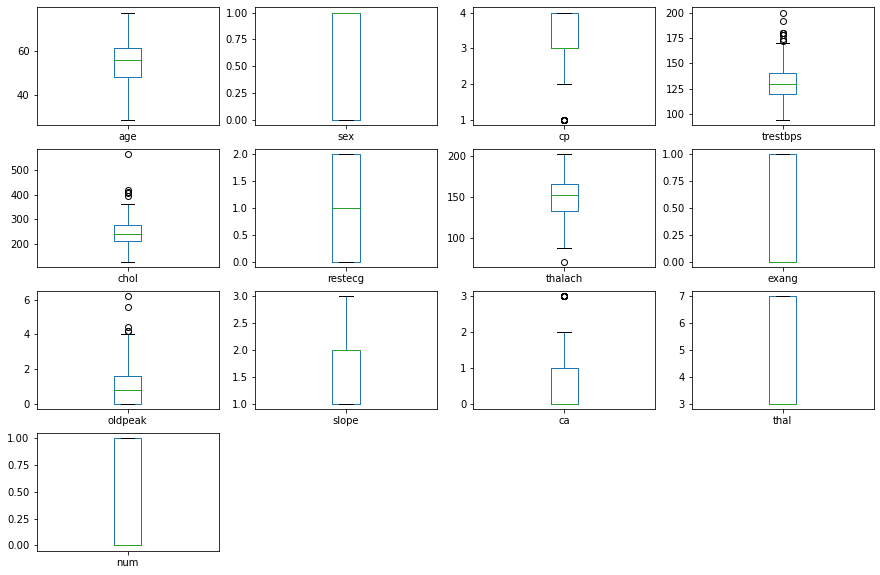

In [381]:
df.plot(kind='box',subplots=True,layout=(4,4),figsize=(15,10))

we see that outliers are present,which we will remove

In [382]:
#checking skewness
df.skew()

age        -0.209060
sex        -0.774935
cp         -0.841754
trestbps    0.706035
chol        1.135503
restecg     0.019900
thalach    -0.537449
exang       0.742532
oldpeak     1.269720
slope       0.508316
ca          1.208791
thal        0.256375
num         0.166406
dtype: float64

In [383]:
#remove skewness
for col in df.columns:
    if df[col].skew()>0.55:
        df[col]=np.log1p(df[col])

In [384]:
df.skew()

age        -0.209060
sex        -0.774935
cp         -0.841754
trestbps    0.281940
chol        0.081733
restecg     0.019900
thalach    -0.537449
exang       0.742532
oldpeak     0.396825
slope       0.508316
ca          0.770355
thal        0.256375
num         0.166406
dtype: float64

In [385]:
#remove skewness
for col in df.columns:
    if df[col].skew()<-0.55:
        df[col]=np.log1p(df[col])

In [386]:
df.skew()

age        -0.209060
sex        -0.774935
cp         -1.266692
trestbps    0.281940
chol        0.081733
restecg     0.019900
thalach    -0.537449
exang       0.742532
oldpeak     0.396825
slope       0.508316
ca          0.770355
thal        0.256375
num         0.166406
dtype: float64

# Removing Outliers

In [301]:
from scipy.stats import zscore
z_score=abs(zscore(df))
print(df.shape)

df_new=df.loc[(z_score<3).all(axis=1)]
print(df_new.shape)

(303, 13)
(298, 13)


Outliers have been removed

In [302]:
x=df_new.iloc[:,:-1]
x.shape

(298, 12)

In [303]:
y=df_new.iloc[:,-1]
y.shape

(298,)

In [304]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)

# Train_Test_Split

In [305]:
#Breaking input and target variable into train and test data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=42)

In [306]:
print('x_train_shape:',x_train.shape)
print('x_test_shape:',x_test.shape)
print('y_train_shape:',y_train.shape)
print('y_test_shape:',y_test.shape)

x_train_shape: (238, 12)
x_test_shape: (60, 12)
y_train_shape: (238,)
y_test_shape: (60,)


In [307]:
#i mporting our models library

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

#importing metrics
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [308]:
##cross validate the models
from sklearn.model_selection import cross_val_score
model=[LogisticRegression(),DecisionTreeClassifier(),KNeighborsClassifier(),SVC(),GaussianNB()]
for m in model:
    score=cross_val_score(m,x,y,cv=5)
    print('score of ',m,'is:')
    print('score:',score)
    print('mean score:',score.mean())
    print('standard deviation:',score.std())
    print('******************************************************')
    print('\n')

score of  LogisticRegression() is:
score: [0.85       0.86666667 0.76666667 0.81355932 0.79661017]
mean score: 0.8187005649717515
standard deviation: 0.036062018992666554
******************************************************


score of  DecisionTreeClassifier() is:
score: [0.68333333 0.9        0.73333333 0.84745763 0.72881356]
mean score: 0.7785875706214689
standard deviation: 0.08134227757351341
******************************************************


score of  KNeighborsClassifier() is:
score: [0.83333333 0.88333333 0.8        0.79661017 0.76271186]
mean score: 0.8151977401129944
standard deviation: 0.04074946635169481
******************************************************


score of  SVC() is:
score: [0.85       0.9        0.8        0.83050847 0.76271186]
mean score: 0.8286440677966102
standard deviation: 0.046300667332783395
******************************************************


score of  GaussianNB() is:
score: [0.83333333 0.86666667 0.8        0.83050847 0.79661017]
mean sco

In [327]:
max_accuracy_score=0
for r_state in range(30,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=r_state,test_size=.20)
    lg=LogisticRegression()
    lg.fit(x_train,y_train)
    lg_pred=lg.predict(x_test)
    accuracy_scr=accuracy_score(y_test,lg_pred)
    if accuracy_scr>max_accuracy_score:
        max_accuracy_score=accuracy_scr
        final_r_state=r_state
        
print('max accuracy score corresponding to ',final_r_state,'is',max_accuracy_score)

max accuracy score corresponding to  55 is 0.9166666666666666


# logistic regression

In [328]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=55)

In [329]:
lg=LogisticRegression()
lg.fit(x_train,y_train)
predlg=lg.predict(x_test)
print('accuracy_score:',accuracy_score(y_test,predlg))
print(confusion_matrix(y_test,predlg))
print(classification_report(y_test,predlg))

accuracy_score: 0.9166666666666666
[[29  3]
 [ 2 26]]
              precision    recall  f1-score   support

           0       0.94      0.91      0.92        32
           1       0.90      0.93      0.91        28

    accuracy                           0.92        60
   macro avg       0.92      0.92      0.92        60
weighted avg       0.92      0.92      0.92        60



# Decision Tree Classifier

In [331]:
from sklearn.model_selection import GridSearchCV

parameters={'criterion':['gini','entropy'],'random_state':range(40,100)}
dtc=DecisionTreeClassifier()
clf=GridSearchCV(dtc,parameters)
clf.fit(x,y)

print(clf.best_params_)

{'criterion': 'gini', 'random_state': 41}


In [334]:
#decisiontreeclassifier

dtc=DecisionTreeClassifier(criterion='gini',random_state=41)
dtc.fit(x_train,y_train)
preddtc=dtc.predict(x_test)
print('accuracy_score:',accuracy_score(y_test,preddtc))
print('\n')
print(confusion_matrix(y_test,preddtc))
print('\n')
print(classification_report(y_test,preddtc))

accuracy_score: 0.7833333333333333


[[25  7]
 [ 6 22]]


              precision    recall  f1-score   support

           0       0.81      0.78      0.79        32
           1       0.76      0.79      0.77        28

    accuracy                           0.78        60
   macro avg       0.78      0.78      0.78        60
weighted avg       0.78      0.78      0.78        60



# SVC

In [335]:
#gridsearchcv
parameters={'kernel':['linear','rbf'],'C':[1,10],'random_state':range(40,100)}
svc=SVC()
clf=GridSearchCV(svc,parameters)
clf.fit(x,y)


print(clf.best_params_)

{'C': 1, 'kernel': 'rbf', 'random_state': 40}


In [336]:
#svc

svc=SVC(kernel='rbf',C=1,random_state=40)
svc.fit(x_train,y_train)
predsvc=svc.predict(x_test)
print('accuracy_score:',accuracy_score(y_test,predsvc))
print('\n')
print(confusion_matrix(y_test,predsvc))
print('\n')
print(classification_report(y_test,predsvc))

accuracy_score: 0.9166666666666666


[[29  3]
 [ 2 26]]


              precision    recall  f1-score   support

           0       0.94      0.91      0.92        32
           1       0.90      0.93      0.91        28

    accuracy                           0.92        60
   macro avg       0.92      0.92      0.92        60
weighted avg       0.92      0.92      0.92        60



#         KNN

In [337]:
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)
predknn=knn.predict(x_test)
print('accuracy_score:',accuracy_score(y_test,predknn))
print('\n')
print(confusion_matrix(y_test,predknn))
print('\n')
print(classification_report(y_test,predknn))

accuracy_score: 0.9166666666666666


[[29  3]
 [ 2 26]]


              precision    recall  f1-score   support

           0       0.94      0.91      0.92        32
           1       0.90      0.93      0.91        28

    accuracy                           0.92        60
   macro avg       0.92      0.92      0.92        60
weighted avg       0.92      0.92      0.92        60



# Naive Bayes

In [339]:
gnb=GaussianNB()
gnb.fit(x_train,y_train)
predgnb=gnb.predict(x_test)
print('accuracy_score:',accuracy_score(y_test,predgnb))
print('\n')
print(confusion_matrix(y_test,predgnb))
print('\n')
print(classification_report(y_test,predgnb))

accuracy_score: 0.9


[[29  3]
 [ 3 25]]


              precision    recall  f1-score   support

           0       0.91      0.91      0.91        32
           1       0.89      0.89      0.89        28

    accuracy                           0.90        60
   macro avg       0.90      0.90      0.90        60
weighted avg       0.90      0.90      0.90        60



# using ensemble technique to boostup our score

# RandomForestClassifier

In [342]:
from sklearn.ensemble import RandomForestClassifier

rf=RandomForestClassifier(n_estimators=50,random_state=30)

rf.fit(x_train,y_train)
predrf=rf.predict(x_test)
print(accuracy_score(y_test,predrf))
print(confusion_matrix(y_test,predrf))
print(classification_report(y_test,predrf,labels=[0,1]))

0.9166666666666666
[[29  3]
 [ 2 26]]
              precision    recall  f1-score   support

           0       0.94      0.91      0.92        32
           1       0.90      0.93      0.91        28

    accuracy                           0.92        60
   macro avg       0.92      0.92      0.92        60
weighted avg       0.92      0.92      0.92        60



# AdaBoost Classifier


In [343]:
from sklearn.ensemble import AdaBoostClassifier

ad=AdaBoostClassifier(n_estimators=50,algorithm='SAMME.R')
ad.fit(x_train,y_train)
ad_pred=ad.predict(x_test)
print(accuracy_score(y_test,ad_pred))
print(confusion_matrix(y_test,ad_pred))
print(classification_report(y_test,ad_pred))

0.9166666666666666
[[30  2]
 [ 3 25]]
              precision    recall  f1-score   support

           0       0.91      0.94      0.92        32
           1       0.93      0.89      0.91        28

    accuracy                           0.92        60
   macro avg       0.92      0.92      0.92        60
weighted avg       0.92      0.92      0.92        60



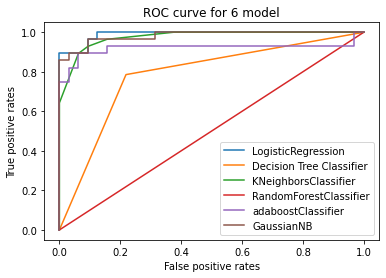

LG AUC score 0.9888392857142857
DTC AUC SCORE 0.7834821428571428
KNN auc score 0.9754464285714286
Random forest classifier 0.984375
Adaboost classifier 0.9185267857142858
Gaussian NB 0.9810267857142858


In [345]:
lgpred_prob=lg.predict_proba(x_test)[:,1]
dtcpred_prob=dtc.predict_proba(x_test)[:,1]
knnpred_prob=knn.predict_proba(x_test)[:,1]
rfpred_prob=rf.predict_proba(x_test)[:,1]
adpred_prob=ad.predict_proba(x_test)[:,1]
gnbpred_prob=gnb.predict_proba(x_test)[:,1]


from sklearn.metrics import roc_curve
lg_tpr,lg_fpr,lg_thresholds=roc_curve(y_test,lgpred_prob)
dtc_tpr,dtc_fpr,dtc_thresholds=roc_curve(y_test,dtcpred_prob)
knn_tpr,knn_fpr,knn_thresholds=roc_curve(y_test,knnpred_prob)
rf_tpr,rf_fpr,rf_threshold=roc_curve(y_test,rfpred_prob)
ad_tpr,ad_fpr,ad_threshold=roc_curve(y_test,adpred_prob)
gnb_tpr,gnb_fpr,gnb_threshold=roc_curve(y_test,gnbpred_prob)


plt.plot(lg_tpr,lg_fpr,label='LogisticRegression')
plt.plot(dtc_tpr,dtc_fpr,label ='Decision Tree Classifier')
plt.plot(knn_tpr,knn_fpr,label='KNeighborsClassifier')
plt.plot(rf_tpr,rf_tpr,label='RandomForestClassifier')
plt.plot(ad_tpr,ad_fpr,label='adaboostClassifier')
plt.plot(gnb_tpr,gnb_fpr,label='GaussianNB')


plt.xlabel('False positive rates')
plt.ylabel('True positive rates')
plt.title('ROC curve for 6 model')
plt.legend(loc='best')
plt.show()

from sklearn.metrics import roc_auc_score
print('LG AUC score',roc_auc_score(y_test,lgpred_prob))
print('DTC AUC SCORE',roc_auc_score(y_test,dtcpred_prob))
print('KNN auc score',roc_auc_score(y_test,knnpred_prob))
print('Random forest classifier',roc_auc_score(y_test,rfpred_prob))
print('Adaboost classifier',roc_auc_score(y_test,adpred_prob))
print('Gaussian NB',roc_auc_score(y_test,gnbpred_prob))


Higher the AUC ,better the model is working
LOGISTICREGRESSION can be used to classify ,who survived or not ,or what factors make people more likely to survive

LOGISTIC REGRESSION is working best,its accuracy score is 91% & AUC score is 98%.
So we save it as the best model

In [349]:
import joblib

joblib.dump(lg,'heartdisease.pkl')

['heartdisease.pkl']